# 📁 E-commerce Customer Churn Analysis (with RFM + ML)


## ✨ Executive Summary

This project focuses on analyzing customer behavior from an online retail dataset to **identify churned customers**.  
Churn is defined as a customer who has not made a purchase in the last 6 months.

The analysis includes:
- Data cleaning and preprocessing of transactional data.
- RFM (Recency, Frequency, Monetary) feature engineering at the customer level.
- Exploratory Data Analysis (EDA) to understand customer patterns.
- Churn labeling based on business logic.
- Predictive modeling using machine learning classifiers such as Logistic Regression, Decision Tree, and Random Forest.

**Goal:** Classify customers as either **Active** or **Churned** and explore patterns that differentiate them.

## 🎯 Objective

- Clean and preprocess raw e-commerce transaction data.
- Perform RFM (Recency, Frequency, Monetary) feature engineering.
- Label customers as Active or Churned based on business logic.
- Train classification models to predict churn status.

## 📦 Dataset Overview

**Source:** [Kaggle - E-commerce Data](https://www.kaggle.com/datasets/carrie1/ecommerce-data)  
**Time Period:** December 2010 to December 2011  
**Region:** UK-based online retailer  
**Original Rows:** 541,909 transactions  

### Features:
- **InvoiceNo:** Invoice number. If it starts with 'C', it's a cancellation.
- **StockCode:** Product item code.
- **Description:** Name of the item.
- **Quantity:** Quantity of items purchased.
- **InvoiceDate:** Date and time of transaction.
- **UnitPrice:** Price per unit.
- **CustomerID:** Unique customer identifier.
- **Country:** Country name.


## 📚Step 1: Importing Required Libraries

We begin by importing all the essential libraries for data manipulation, visualization, and machine learning.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 8)

## 📥Step 2: Loading the Dataset

Load the E-commerce transactional dataset into a pandas DataFrame for analysis and modeling.


In [6]:
df = pd.read_csv(r"C:\Users\AASHIK\Downloads\Projects\Churn\data.csv",encoding='ISO-8859-1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


## 📄Step 3: Dataset Summary & Structure

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
print('No of rows:',df.shape[0])
print('No of columns:',df.shape[1])

No of rows: 541909
No of columns: 8


In [10]:
print('No of values:',df.size)

No of values: 4335272


In [11]:
df.describe(include=[np.number])

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## 🧹Step 4: Data Cleaning and Preprocessing

Handle missing values, correct data types, filter relevant transactions, and prepare the dataset for analysis.


In [13]:
col = df.columns.to_list()

In [14]:
for i in col:
    print(i)
    print(df[i].unique())
    print('************')

InvoiceNo
['536365' '536366' '536367' ... '581585' '581586' '581587']
************
StockCode
['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']
************
Description
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
************
Quantity
[     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   1824    204     69    -36
   -192   -144    160   2880   1400     39    -48    -50    

In [15]:
df.duplicated().sum()

5268

In [16]:
df = df.drop_duplicates()

In [17]:
print('No of rows:',df.shape[0])
print('No of columns:',df.shape[1])

No of rows: 536641
No of columns: 8


In [18]:
null_summary = pd.DataFrame({
    'Null_Count': df.isnull().sum(),
    'Null_Percentage': (df.isnull().sum() / len(df)) * 100
})

print(null_summary)

             Null_Count  Null_Percentage
InvoiceNo             0         0.000000
StockCode             0         0.000000
Description        1454         0.270945
Quantity              0         0.000000
InvoiceDate           0         0.000000
UnitPrice             0         0.000000
CustomerID       135037        25.163377
Country               0         0.000000


In [19]:
print("Negative quantities:", (df['Quantity'] < 0).sum())
print("Negative quantities:", (df['UnitPrice'] < 0).sum())

Negative quantities: 10587
Negative quantities: 2


In [20]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [21]:
df.dropna(subset=['CustomerID'], inplace=True)
df.dropna(subset=['Description'], inplace=True)

In [22]:
df['CustomerID'] = df['CustomerID'].astype('Int64').astype(str)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [23]:
print("Unique Customers:", df['CustomerID'].nunique())
print("Unique Invoices:", df['InvoiceNo'].nunique())

Unique Customers: 4338
Unique Invoices: 18532


In [24]:
num_col = df.select_dtypes(include = np.number).columns.to_list()
num_col

['Quantity', 'UnitPrice']

###  Outlier Detection & Removal

Outliers can skew the distribution of features and negatively affect model performance, especially for distance-based or tree-based algorithms.

In this step, we identify and handle outliers using statistical techniques such as:
- **Boxplots** to visually detect extreme values.
- **IQR (Interquartile Range)** method to systematically flag and remove outliers from important numeric features (like `Monetary`, `Quantity`, or `AvgOrderValue`).

This step ensures that our analysis and models are not biased or misled by anomalous data points.


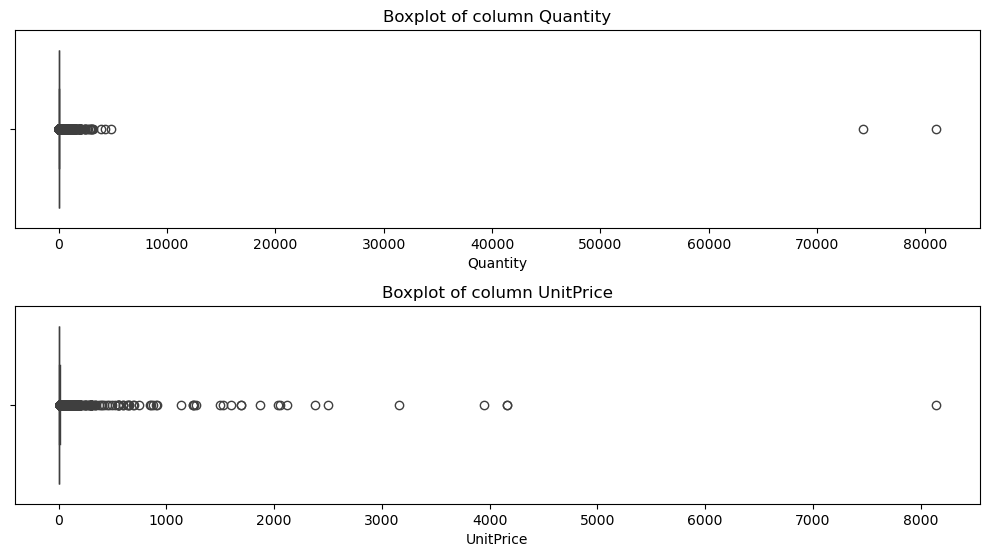

In [26]:
t = 1
for i in num_col:
    plt.subplot(3, 1, t)
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot of column {i}')
    t += 1
plt.tight_layout()
plt.show()

* The boxplot shows clear outliers in features like `Quantity` and `UnitPrice`.  
* To improve analysis and modeling accuracy, we removed extreme values and negative entries from the dataset.


In [28]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

df = remove_outliers_iqr(df, 'Quantity')
df = remove_outliers_iqr(df, 'UnitPrice')

## 🛠️Step 5: Feature Engineering

Create new variables such as **Sales**.


In [30]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [31]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


## 📊Step 6: Exploratory Data Analysis (EDA)

Now that we've cleaned the data and created key features like `Sales`, we perform EDA to understand customer purchasing behavior. This includes examining how Sales varies across countries, time, and customer segments.

### Top 10 Countries by Total Sales
This bar plot shows which countries generate the highest total reven

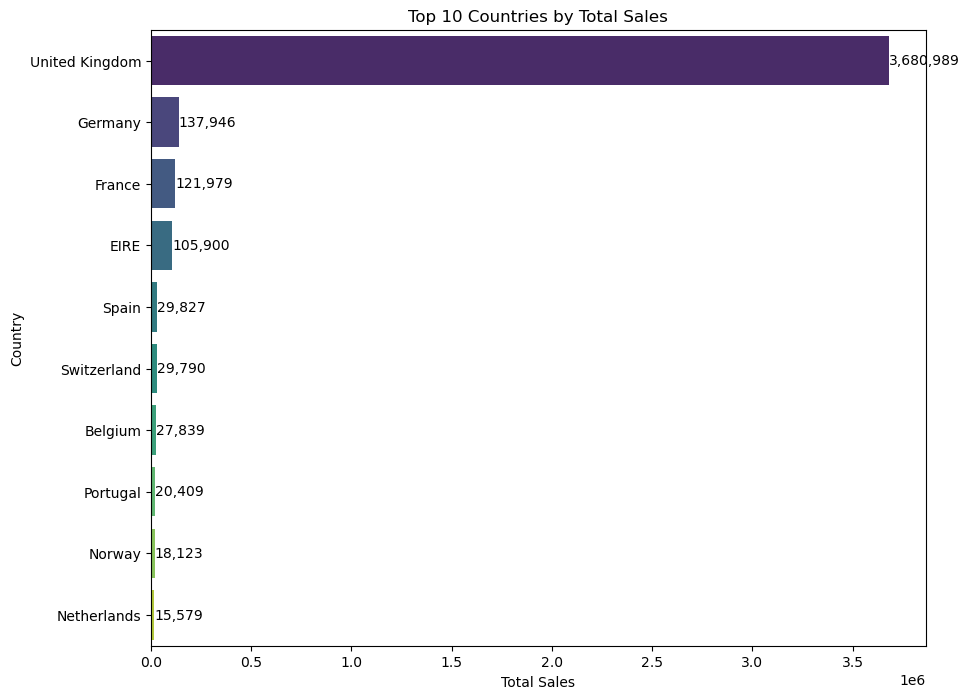

In [34]:
country_sales = df.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(10)
ax=sns.barplot(x=country_sales.values, y=country_sales.index, palette='viridis')
plt.title("Top 10 Countries by Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Country")

for i, value in enumerate(country_sales.values):
    ax.text(value, i, f'{value:,.0f}', va='center')

plt.show()


 
**Insight:** The UK is the largest revenue contributor, far ahead of other countries.


### Top 10 Countries by Number of Orders
Displays the top countries based on the number of unique purchase sessions (InvoiceNo), indicating high customer engagement.

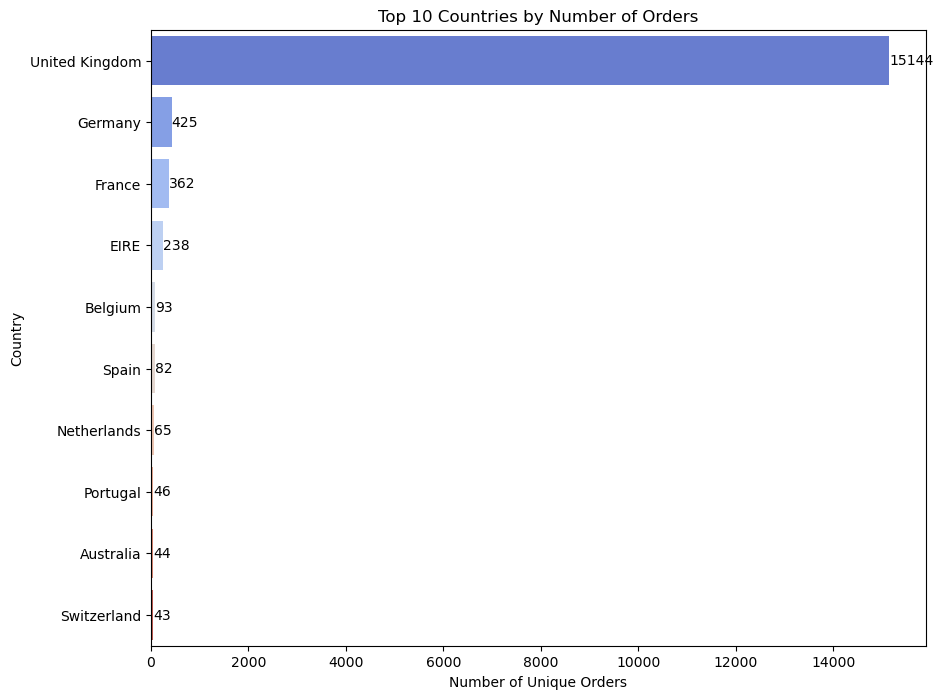

In [37]:
orders_by_country = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False).head(10)


ax = sns.barplot(x=orders_by_country.values, y=orders_by_country.index, palette='coolwarm')
plt.title("Top 10 Countries by Number of Orders")
plt.xlabel("Number of Unique Orders")
plt.ylabel("Country")

for i, value in enumerate(orders_by_country.values):
    ax.text(value, i, str(value), va='center')

plt.show()


**Insight:** The UK has the highest number of purchase orders, indicating a larger active customer base.

### Monthly Sales Trend
A line plot showing total sales per month to uncover seasonal trends or business growth over time.

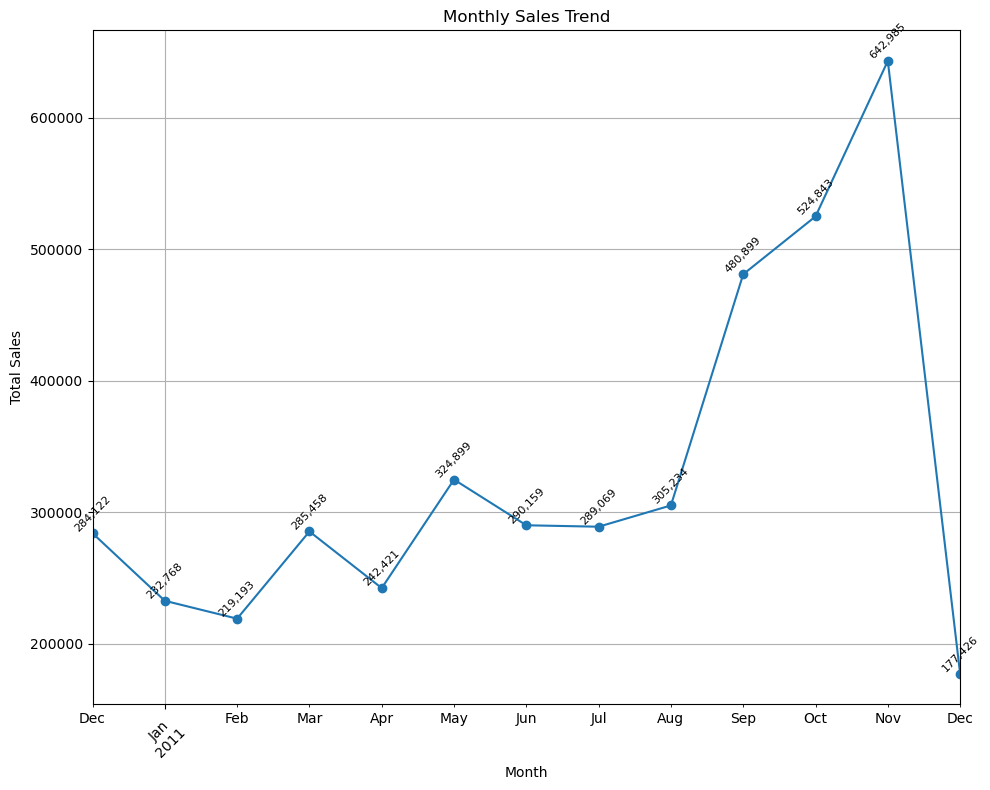

In [40]:
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Sales'].sum()


ax = monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)

for x, y in zip(monthly_sales.index.astype(str), monthly_sales.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8, rotation=45)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Insight:** Sales peaked in November and December, suggesting seasonal demand during the holidays.


### Top 10 Products by Sales
Highlights the products contributing the most to revenue, useful for inventory and marketing decisions.

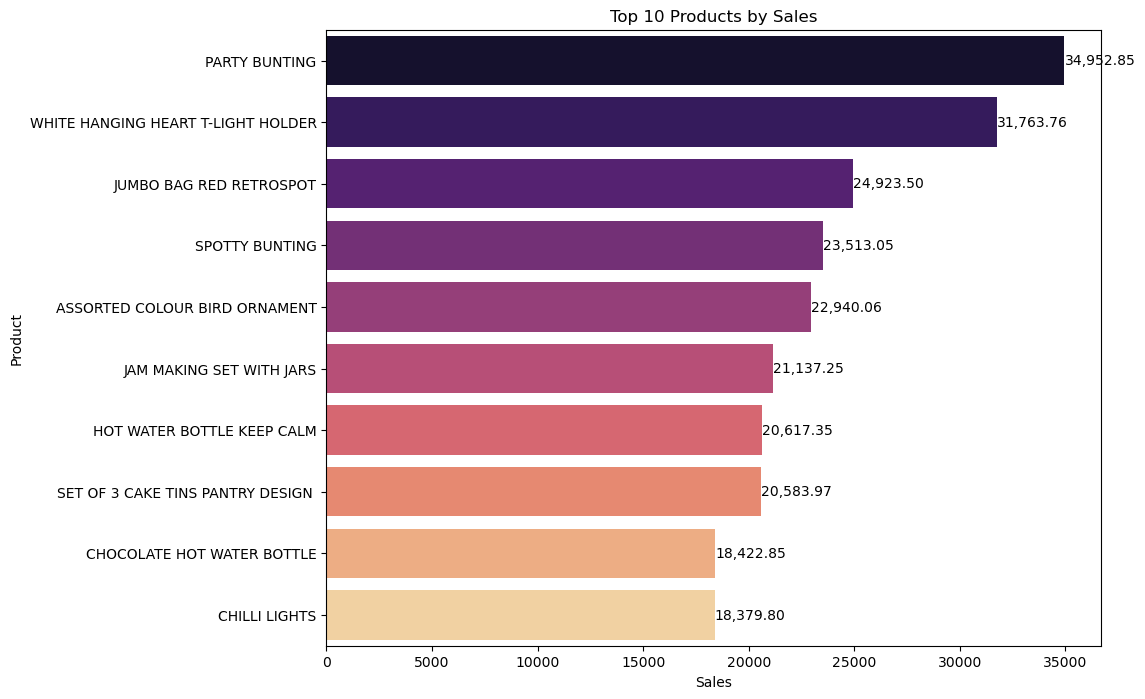

In [43]:
top_products = df.groupby('Description')['Sales'].sum().sort_values(ascending=False).head(10)

ax = sns.barplot(x=top_products.values, y=top_products.index, palette='magma')
plt.title("Top 10 Products by Sales")
plt.xlabel("Sales")
plt.ylabel("Product")

for i, value in enumerate(top_products.values):
    ax.text(value, i, f'{value:,.2f}', va='center')

plt.show()


**Insight:** A few products dominate sales, indicating strong customer preferences for top items.


### Monthly Sales by Country (Heatmap)
Combines time and geography to show how monthly sales vary across different countries.



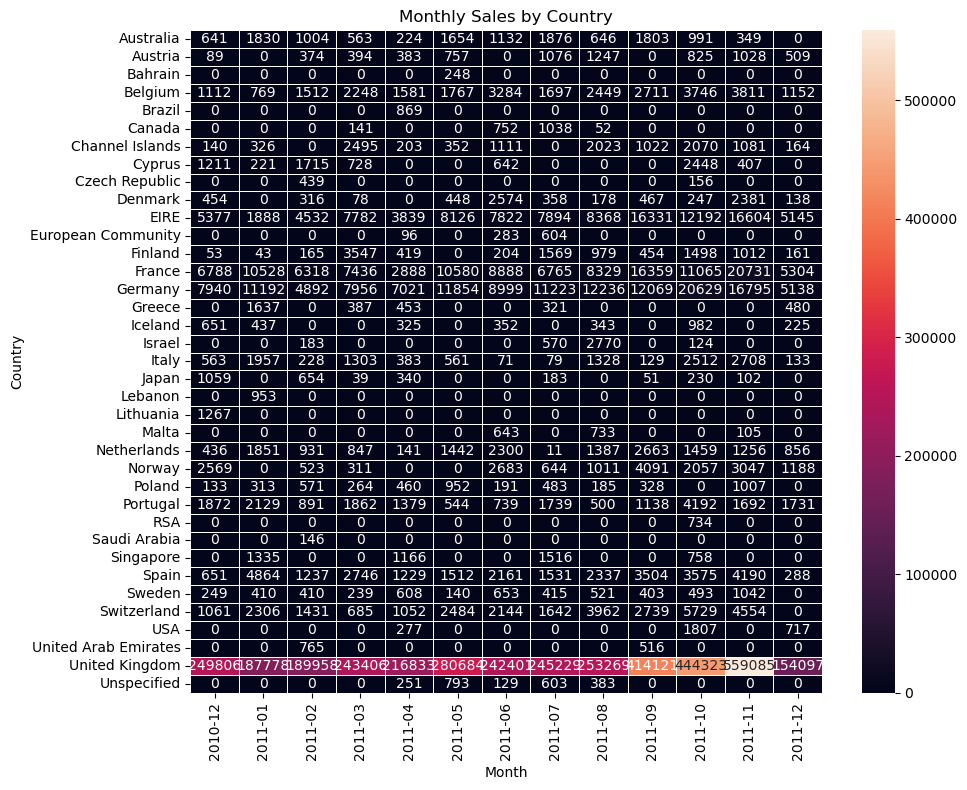

In [46]:
country_month_sales = df.groupby([df['InvoiceDate'].dt.to_period('M'), 'Country'])['Sales'].sum().unstack().fillna(0)

sns.heatmap(country_month_sales.T, annot=True, fmt=".0f", linewidths=0.5)
plt.title("Monthly Sales by Country")
plt.xlabel("Month")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


**Insight:** The UK consistently outperforms other countries in monthly sales across the year.


## 🧮Step 7: RFM Feature Engineering (Customer-Level)


We transform transactional data into customer-level features using an extended RFM approach:

- **Recency**: Days since the customer's last purchase.
- **Frequency**: Total number of unique purchase sessions (`InvoiceNo` count).
- **Monetary**: Total revenue contributed by the customer.
- **TotalQuantity**: Total number of items purchased by the customer across all orders.

These features help us understand customer behavior patterns and are critical inputs for churn prediction.


In [49]:
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
customer_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (reference_date - x.max()).days,'InvoiceNo': 'nunique','Sales': 'sum','Quantity':'sum'})
customer_df.columns = ['Recency','Frequency','Monetary','TotalQuantity']
customer_df = customer_df.reset_index()

In [50]:
customer_df['AvgOrderValue'] = customer_df['Monetary'] / customer_df['Frequency']

In [51]:
customer_df

,CustomerID,Recency,Frequency,Monetary,TotalQuantity,AvgOrderValue
0,12347,2,7,3314.73,1893,473.532857
1,12348,249,3,90.20,140,30.066667
2,12349,19,1,999.15,523,999.150000
3,12350,310,1,294.40,196,294.400000
4,12352,36,7,1130.94,500,161.562857
...,...,...,...,...,...,...
4186,18280,278,1,137.00,40,137.000000
4187,18281,181,1,46.92,52,46.920000
4188,18282,8,2,113.13,51,56.565000
4189,18283,4,16,2002.63,1353,125.164375


### 📊 RFM Feature Visualization

We visualize the distribution and relationships among the key RFM features:

- **Histograms with KDE** help understand the spread and skew of Recency, Frequency, and Monetary values.
- **Boxplots** reveal outliers in each feature.
- **Pairplot** explores relationships and clustering patterns between RFM variables.


#### Distribution of RFM Features (Histograms)
Visualize the distribution and skewness of Recency, Frequency, and Monetary values. The KDE curve helps in identifying the concentration of values and outliers.

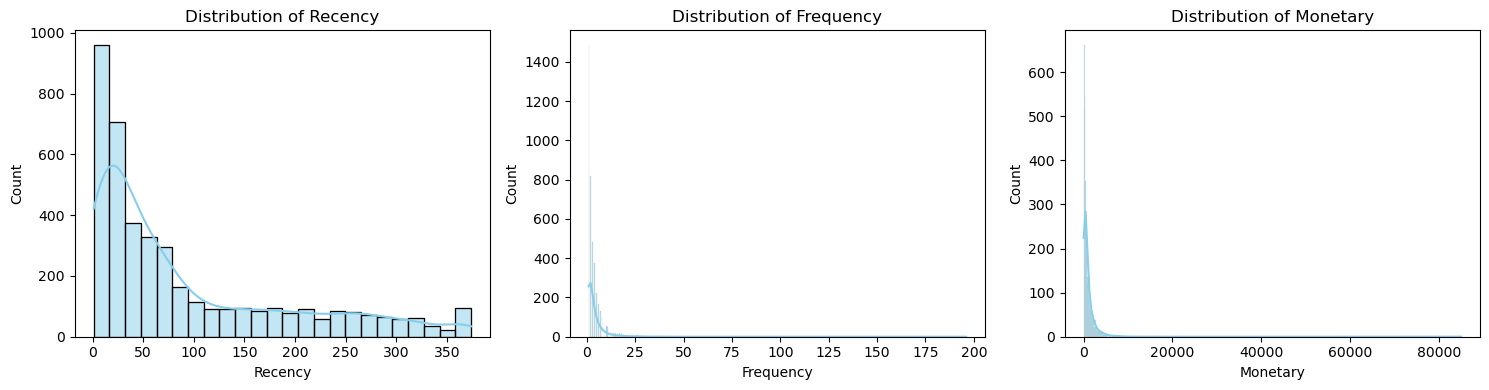

In [54]:
rfm_cols = ['Recency', 'Frequency', 'Monetary']
plt.figure(figsize=(15, 4))
for i, col in enumerate(rfm_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(customer_df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Insight:** 
* Recency is right-skewed, meaning most customers purchased recently.
* Frequency is also right-skewed, with most customers ordering only a few times.
* Monetary is highly skewed, indicating that a small group of customers generates most of the revenue.




#### Outlier Detection in RFM Features (Boxplots)
Boxplots reveal potential outliers in each RFM feature. These outliers may influence modeling and may require treatment.

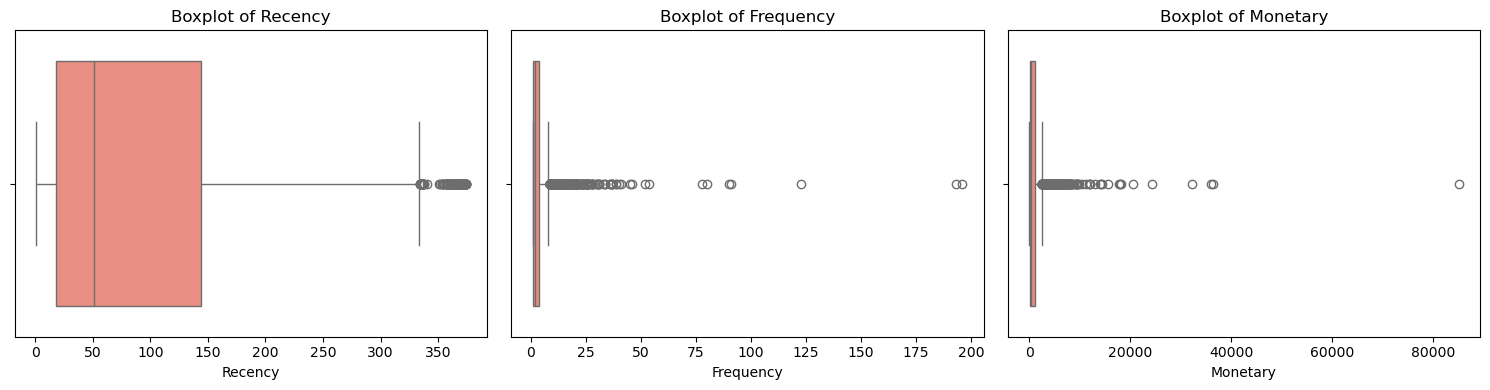

In [57]:
plt.figure(figsize=(15, 4))
for i, col in enumerate(rfm_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=customer_df[col], color='salmon')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


**Insight:** Several outliers exist in Monetary and Frequency, mostly from high-spending customers.


#### Relationships Between RFM Features (Pairplot)
This pairplot explores the inter-relationships between Recency, Frequency, and Monetary values. It helps spot clusters or trends among customer behaviors.

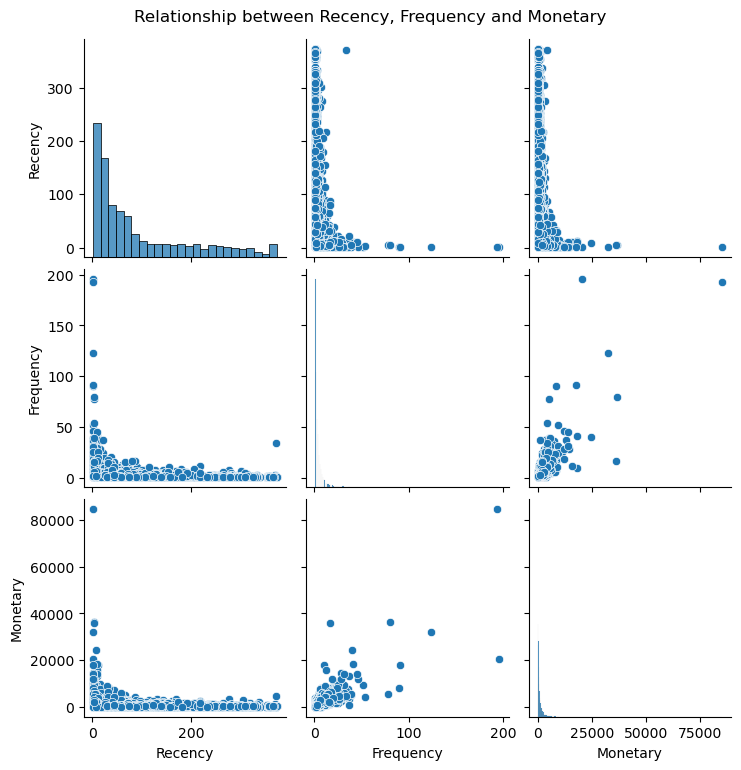

In [60]:
sns.pairplot(customer_df[rfm_cols])
plt.suptitle("Relationship between Recency, Frequency and Monetary", y=1.02)
plt.show()


**Insight:** Monetary and Frequency show a strong positive relationship — frequent buyers tend to spend more.


## 🔖Step 8: Churn Labeling

Define churned vs active customers based on Recency. Customers inactive for over 90 days are labeled as **churned (1)**, others as **active (0)**.


In [63]:
churn_threshold = 90
customer_df['ChurnStatus'] = customer_df['Recency'].apply(lambda x: 1 if x > churn_threshold else 0)

In [64]:
customer_df.head()

,CustomerID,Recency,Frequency,Monetary,TotalQuantity,AvgOrderValue,ChurnStatus
0,12347,2,7,3314.73,1893,473.532857,0
1,12348,249,3,90.20,140,30.066667,1
2,12349,19,1,999.15,523,999.150000,0
3,12350,310,1,294.40,196,294.400000,1
4,12352,36,7,1130.94,500,161.562857,0


In [65]:
customer_df['ChurnStatus'].value_counts()

ChurnStatus
0    2802
1    1389
Name: count, dtype: int64

## 📊Step 9: Churn-Based Customer Behavior Analysis

* In this section, we dive deeper into customer behavior to understand the differences between **Churned** and **Active** customers.  
We analyze key features such as **Recency, Frequency, Monetary value, Quantity**, and **Average Order Value**.

* The aim is to uncover behavioral patterns that help in **building predictive models** for churn classification, and to visualize how these features vary across customer segments.

In [67]:
features = ['Recency', 'Frequency', 'Monetary', 'TotalQuantity', 'AvgOrderValue']

#### Feature Distributions by Churn Status (Histogram + KDE)
Explore how customer features like Recency, Frequency, Monetary, Quantity, AvgOrderValue, etc., differ between Churned and Active customers using histogram plots with KDE.



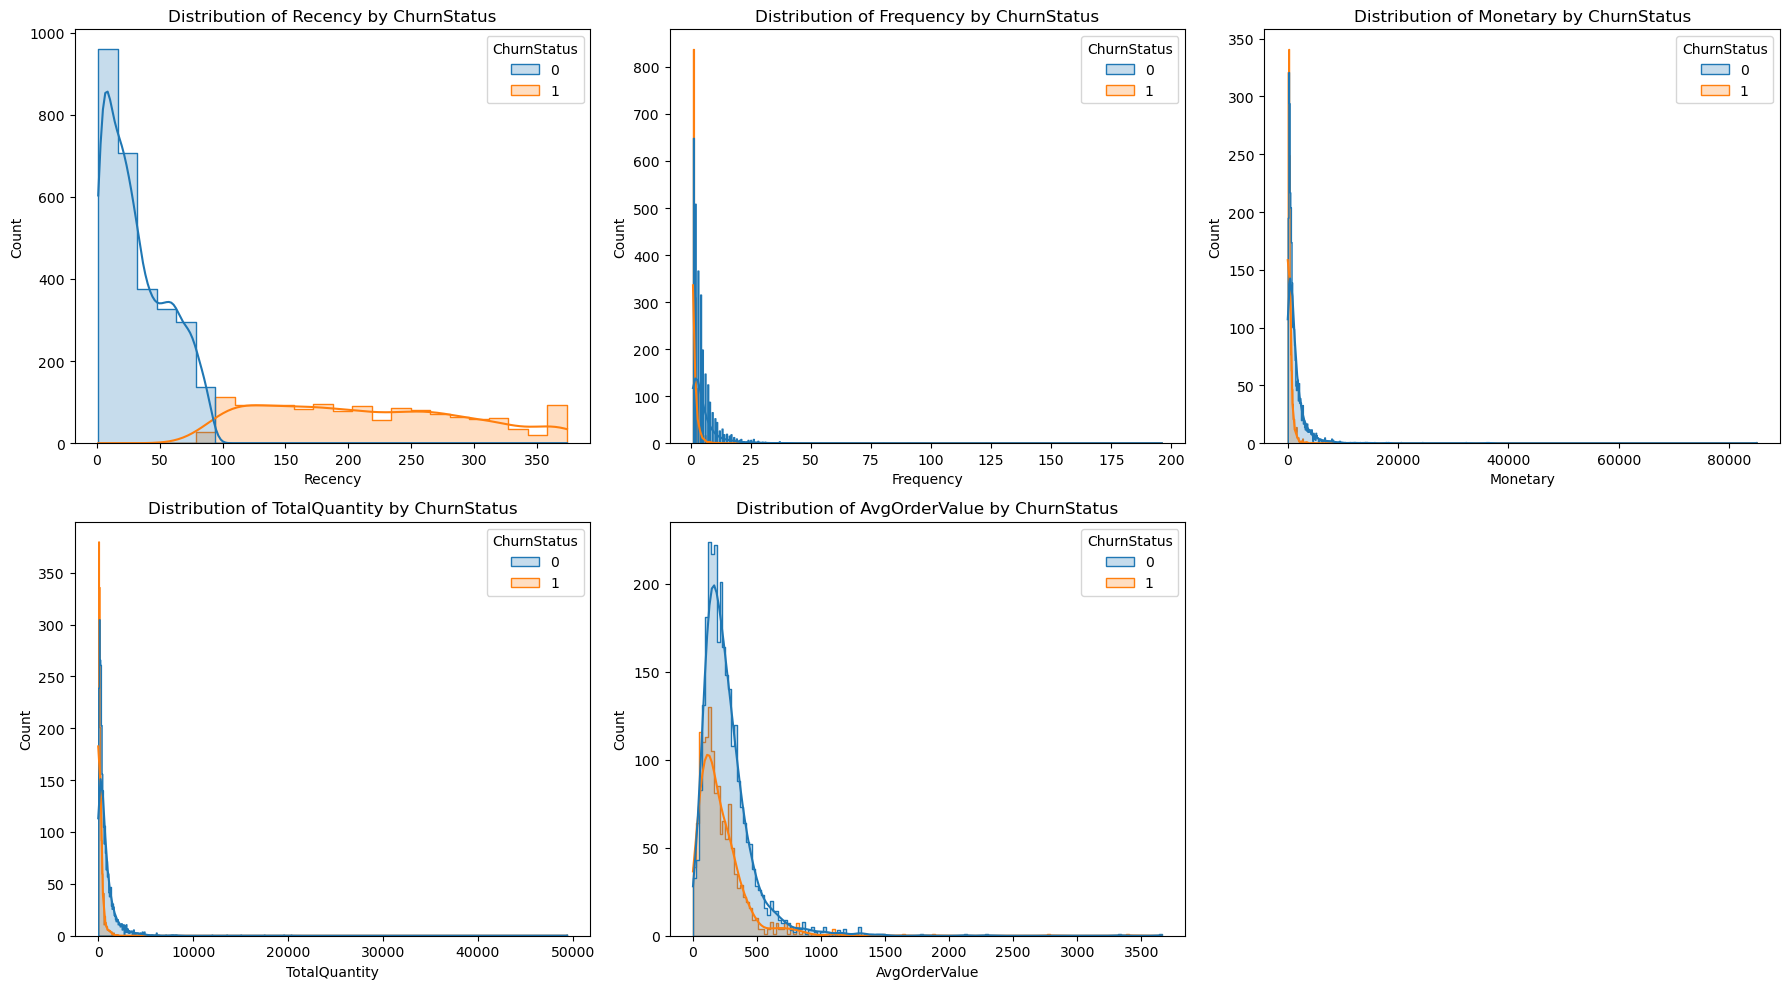

In [69]:
plt.figure(figsize=(18, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=customer_df, x=feature, hue='ChurnStatus', kde=True, element='step')
    plt.title(f'Distribution of {feature} by ChurnStatus')
plt.tight_layout()
plt.show()

**Insight:** Churned customers tend to have higher Recency and lower Frequency and Monetary values.


#### Boxplots of Features by Churn Status
Boxplots help visualize feature differences across churn groups and highlight outliers for each group.

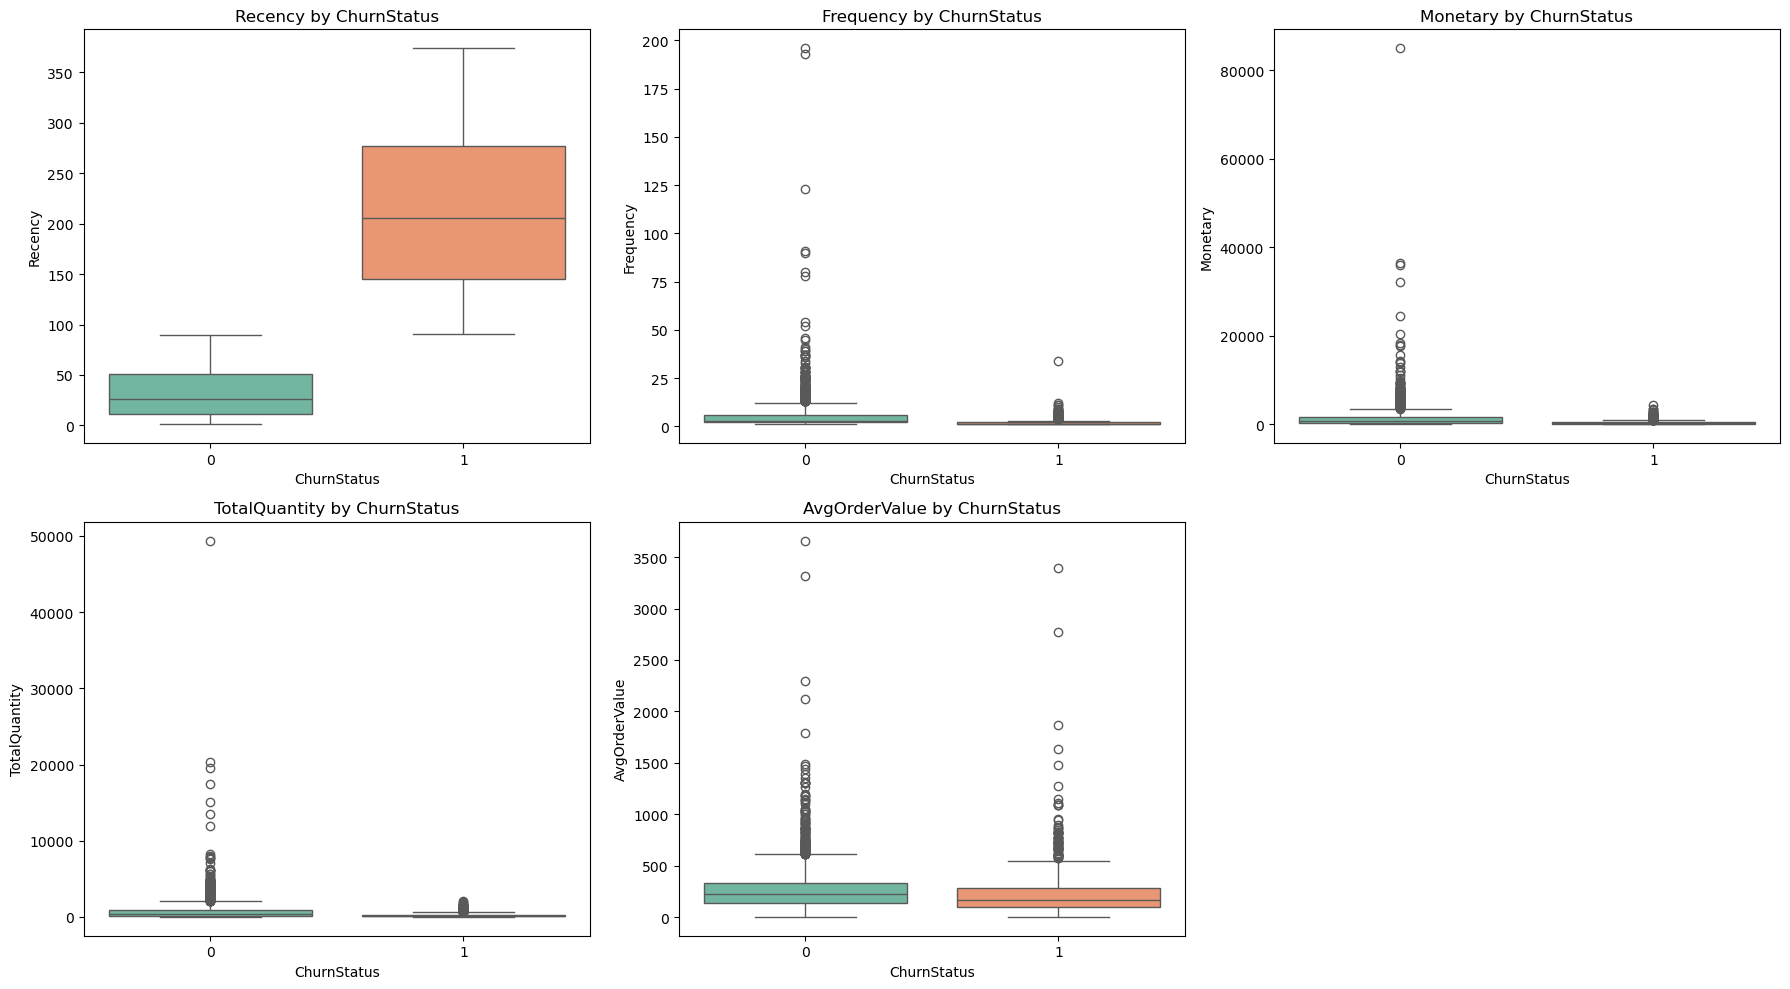

In [72]:
plt.figure(figsize=(18, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='ChurnStatus', y=feature, data=customer_df, palette='Set2')
    plt.title(f'{feature} by ChurnStatus')
    plt.xlabel('ChurnStatus')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()


**Insight:** Churned customers show significantly lower engagement across most features.


#### Overall Churn Distribution (Barplot)
Simple countplot showing how many customers have churned versus those who are still active.

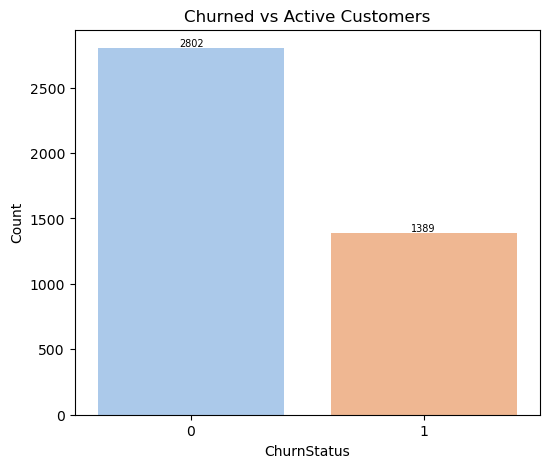

In [75]:
plt.figure(figsize=(6, 5))
ct = sns.countplot(x='ChurnStatus', data=customer_df, palette='pastel')
plt.title('Churned vs Active Customers')
plt.xlabel('ChurnStatus')
plt.ylabel('Count')

for c in ct.containers:
    ct.bar_label(c, fmt='%d', label_type='edge', fontsize=7)


plt.show()


**Insight:** There is a considerable number of churned customers in the dataset.

#### Churn Rate Proportion (Pie Chart)
Visualizes the percentage split between churned and active customers to understand overall churn impact.

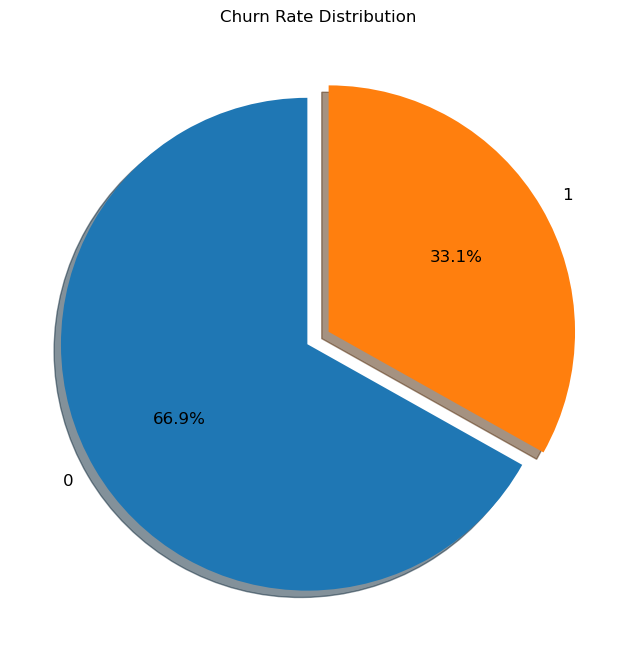

In [78]:
plt.figure(figsize=(10,8))
customer_df['ChurnStatus'].value_counts().plot.pie(autopct='%1.1f%%',startangle=90,shadow=True,
                                                   explode=(0.05, 0.05),textprops={'fontsize': 12})
plt.title('Churn Rate Distribution')
plt.ylabel('')
plt.show()

**Insight:** Around 30–40% of customers have churned.

#### Average Monetary Value by Churn Status
Barplot showing the average revenue contribution of churned vs active customers — useful to identify revenue loss risk.

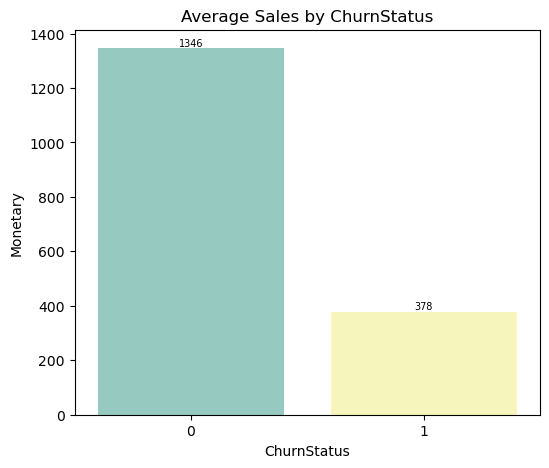

In [81]:
plt.figure(figsize=(6,5))
ct=sns.barplot(x='ChurnStatus', y='Monetary', data=customer_df, estimator='mean', ci=None, palette='Set3')
plt.title('Average Sales by ChurnStatus')
for c in ct.containers:
    ct.bar_label(c, fmt='%d', label_type='edge', fontsize=7)
plt.show()


**Insight:** Active customers contribute higher revenue on average compared to churned ones.

#### Churn by Country (Top 10 Countries)
Shows the number of churned vs active customers across the top 10 countries to detect regional churn patterns.

In [84]:
top_countries = df['Country'].value_counts().head(10).sort_values(ascending=False).index
top_countries =top_countries.sort_values()

country_map = df[['CustomerID', 'Country']].drop_duplicates()
customer_df = customer_df.merge(country_map, on='CustomerID', how='left')


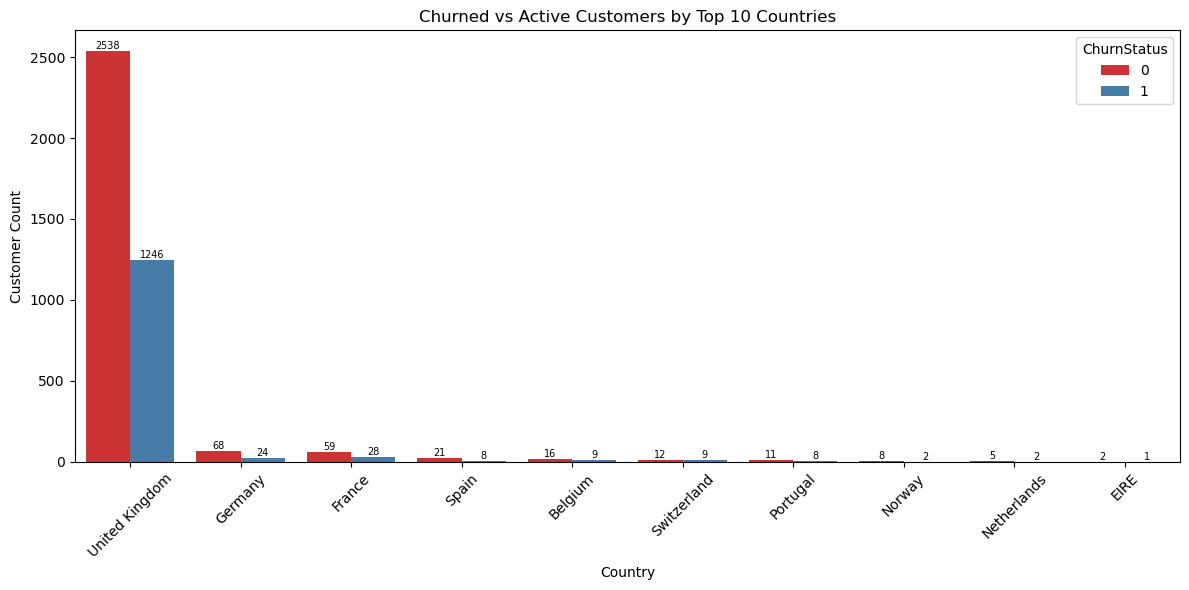

In [85]:
plt.figure(figsize=(12, 6))
data1=customer_df[customer_df['Country'].isin(top_countries)]
country_order = (data1.groupby('Country').size().sort_values(ascending=False).index)
ct=sns.countplot(data=data1, x='Country', hue='ChurnStatus', palette='Set1',order=country_order)
plt.title('Churned vs Active Customers by Top 10 Countries')
plt.xticks(rotation=45)
plt.ylabel("Customer Count")
plt.tight_layout()
for c in ct.containers:
    ct.bar_label(c, fmt='%d', label_type='edge', fontsize=7)

plt.show()


**Insight:** The UK has the most churned customers, likely due to its large base.


#### Churn by Customer Spending Segment
Customers are segmented into Low, Mid, and High Spenders. This shows how churn rates differ by spending behavior.

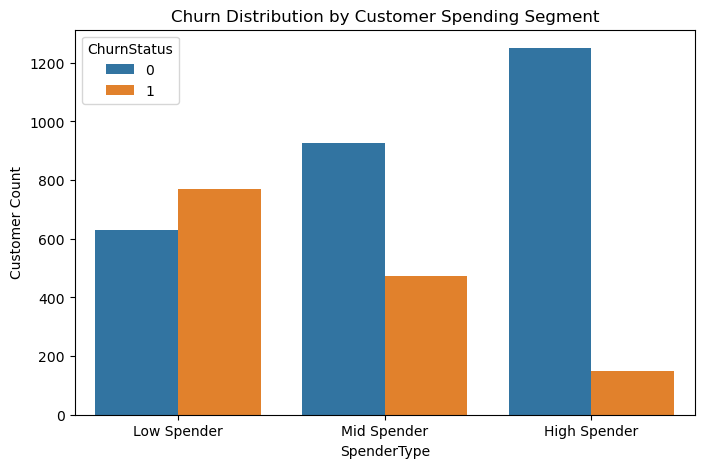

In [88]:
customer_df['SpenderType'] = pd.qcut(customer_df['Monetary'], q=3,labels=['Low Spender', 'Mid Spender', 'High Spender'])
plt.figure(figsize=(8, 5))
sns.countplot(data=customer_df, x='SpenderType', hue='ChurnStatus')
plt.title('Churn Distribution by Customer Spending Segment')
plt.ylabel('Customer Count')
plt.show()


**Insight:** Churn is highest among low spenders, while high spenders show stronger loyalty.

#### correlation Between Customer Features
A heatmap to show correlations among customer-level features, helping identify multicollinearity or linked behaviors.

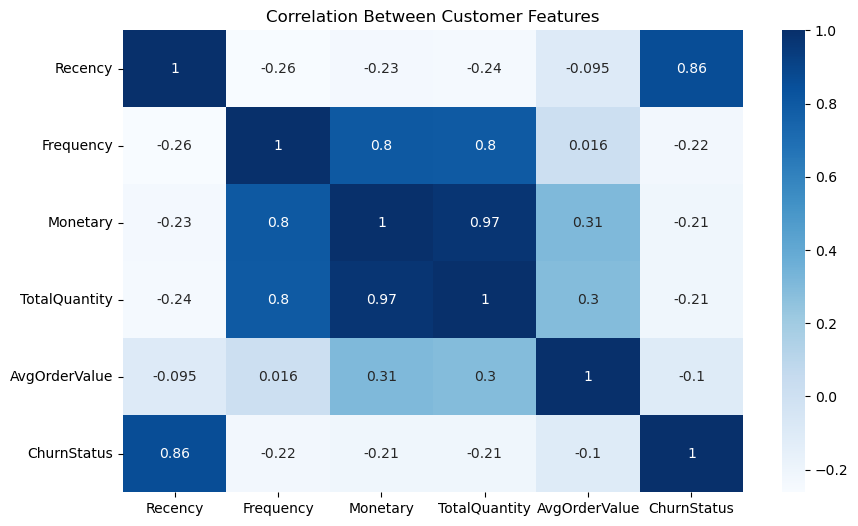

In [91]:
plt.figure(figsize=(10, 6))
sns.heatmap(customer_df.drop(columns=['CustomerID']).corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Correlation Between Customer Features')
plt.show()


**Insight:** 
* Frequency and Monetary are positively correlated, while Recency is negatively correlated with both — indicating that frequent and recent buyers tend to spend more.
* ChurnStatus is positively correlated with Recency and negatively correlated with Frequency and Monetary, confirming that customers who buy more often and spend more are less likely to churn.


In [93]:
customer_df

,CustomerID,Recency,Frequency,Monetary,TotalQuantity,AvgOrderValue,ChurnStatus,Country,SpenderType
0,12347,2,7,3314.73,1893,473.532857,0,Iceland,High Spender
1,12348,249,3,90.20,140,30.066667,1,Finland,Low Spender
2,12349,19,1,999.15,523,999.150000,0,Italy,High Spender
3,12350,310,1,294.40,196,294.400000,1,Norway,Mid Spender
4,12352,36,7,1130.94,500,161.562857,0,Norway,High Spender
...,...,...,...,...,...,...,...,...,...
4192,18280,278,1,137.00,40,137.000000,1,United Kingdom,Low Spender
4193,18281,181,1,46.92,52,46.920000,1,United Kingdom,Low Spender
4194,18282,8,2,113.13,51,56.565000,0,United Kingdom,Low Spender
4195,18283,4,16,2002.63,1353,125.164375,0,United Kingdom,High Spender


## 🤖 Step 10:Model Development and Evaluation

Now that we’ve engineered features and labeled customers based on churn behavior, we move into the model development phase.  
Here, we train various classification models to predict whether a customer is likely to **churn (1)** or remain **active (0)**.

The process includes:
- Training initial models with all features
- Performing feature importance analysis
- Re-training using selected key features (RFM)
- Evaluating models using accuracy, precision, recall, and F1-score
- Visualizing confusion matrices and performance metrics

###  Step 1:🧪 Train-Test Split

We split the dataset into training and testing sets using stratified sampling to maintain class balance.  
This allows us to evaluate model generalization on unseen data.


In [96]:
x = customer_df[features]
y = customer_df['ChurnStatus']

In [97]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(3357, 5)
(840, 5)
(3357,)
(840,)


### Step 2: 📏Evaluation Metrics Function

We define a utility function to evaluate classification models using standard metrics:
- Accuracy
- Precision
- Recall
- F1-Score
- Weighted F1-Score
- Classification Report


In [99]:
def metrices(name,key,arg):
    print('Name of the model :',name)
    print('Precision score :',precision_score(key,arg))    
    print('Recall score :',recall_score(key,arg)) 
    print('Accuracy :', accuracy_score(key,arg))
    print('F1-Score :', f1_score(key,arg))
    print('Weighted F1-Score', f1_score(key,arg,average='weighted'))
    print('Classification report','\n',classification_report(key,arg,digits=4))

###  Step 3:  ⚙️ Logistic Regression with All Features

We start by training a Logistic Regression model using **all available features**.  
This serves as our baseline model to compare future improvements.


In [101]:
lgr = LogisticRegression()
lgr.fit(xtrain, ytrain)
lgr_pred = lgr.predict(xtest)
metrices('Logistic regression',ytest,lgr_pred)

Name of the model : Logistic regression
Precision score : 0.996415770609319
Recall score : 1.0
Accuracy : 0.9988095238095238
F1-Score : 0.9982046678635548
Weighted F1-Score 0.9988100624167775
Classification report 
               precision    recall  f1-score   support

           0     1.0000    0.9982    0.9991       562
           1     0.9964    1.0000    0.9982       278

    accuracy                         0.9988       840
   macro avg     0.9982    0.9991    0.9987       840
weighted avg     0.9988    0.9988    0.9988       840



### Step 4: Feature Selection using Random Forest 🌲 

We train a Random Forest model to identify the most important features driving churn.  
This feature importance analysis helps us select the most relevant variables (like Recency, Frequency, and Monetary) for model training.  
By focusing on these top features, we can reduce complexity and improve model interpretability.


In [103]:
rf = RandomForestClassifier(random_state=42)
rf.fit(xtrain, ytrain)
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [104]:
feature_importance

,Feature,Importance
0,Recency,0.882693
1,Frequency,0.047183
2,Monetary,0.042278
3,TotalQuantity,0.022426
4,AvgOrderValue,0.005420


#### 📊 Visualizing Top Feature Importances from Random Forest

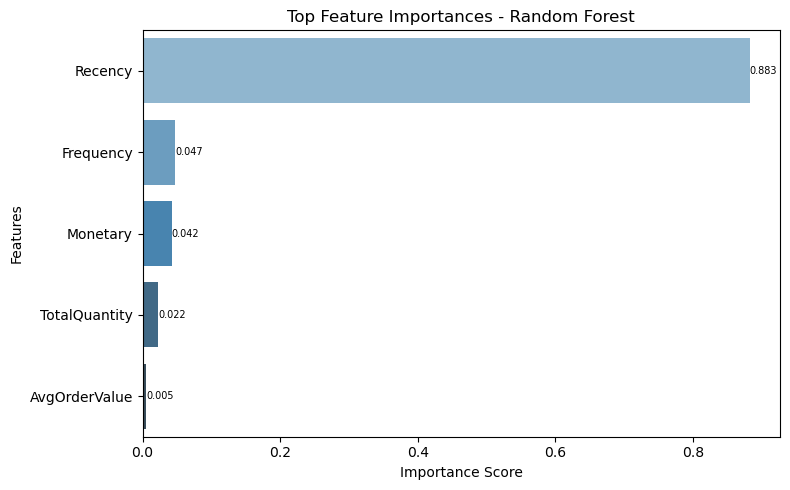

In [106]:
plt.figure(figsize=(8, 5))
ct=sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='Blues_d')
plt.title('Top Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
for c in ct.containers:
    ct.bar_label(c, fmt='%.3f', label_type='edge', fontsize=7,)
plt.show()

### 🧩 Step 5: Model Training with Selected Features (RFM)

Based on the importance analysis and domain knowledge, we choose the key behavioral features:
- Recency
- Frequency
- Monetary

We now retrain models using only these features to reduce dimensionality and focus on customer behavior.


In [108]:
selected_features = ['Recency', 'Frequency', 'Monetary']
x_sel = customer_df[selected_features]
y_sel= customer_df['ChurnStatus']

In [109]:
xtrain_sel, xtest_sel, ytrain_sel, ytest_sel = train_test_split(x_sel, y_sel,test_size=0.2,random_state=42,stratify=y_sel)
print(xtrain_sel.shape)
print(xtest_sel.shape)
print(ytrain_sel.shape)
print(ytest_sel.shape)

(3357, 3)
(840, 3)
(3357,)
(840,)


#### ⚙️ Logistic Regression (Selected Features)

Train a Logistic Regression model using only RFM features.


In [111]:
lgr_sel = LogisticRegression()
lgr_sel.fit(xtrain_sel, ytrain_sel)
lgr_sel_pred = lgr_sel.predict(xtest_sel)
metrices('Logistic regression',ytest_sel,lgr_sel_pred)

Name of the model : Logistic regression
Precision score : 0.996415770609319
Recall score : 1.0
Accuracy : 0.9988095238095238
F1-Score : 0.9982046678635548
Weighted F1-Score 0.9988100624167775
Classification report 
               precision    recall  f1-score   support

           0     1.0000    0.9982    0.9991       562
           1     0.9964    1.0000    0.9982       278

    accuracy                         0.9988       840
   macro avg     0.9982    0.9991    0.9987       840
weighted avg     0.9988    0.9988    0.9988       840



#### 🌳 Decision Tree (Selected Features)

Train a Decision Tree classifier using only RFM features.


In [113]:
dt_sel = DecisionTreeClassifier(random_state=42)
dt_sel.fit(xtrain_sel, ytrain_sel)
dt_sel_pred = dt_sel.predict(xtest_sel)

metrices('Decision Tree (Selected Features)', ytest_sel, dt_sel_pred)

Name of the model : Decision Tree (Selected Features)
Precision score : 1.0
Recall score : 1.0
Accuracy : 1.0
F1-Score : 1.0
Weighted F1-Score 1.0
Classification report 
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       562
           1     1.0000    1.0000    1.0000       278

    accuracy                         1.0000       840
   macro avg     1.0000    1.0000    1.0000       840
weighted avg     1.0000    1.0000    1.0000       840



#### 🌲 Random Forest (Selected Features)

Train a Random Forest model using only RFM features and evaluate its performance.


In [115]:
rf_sel = RandomForestClassifier(random_state=42)
rf_sel.fit(xtrain_sel, ytrain_sel)
rf_sel_pred = rf_sel.predict(xtest_sel)

metrices('Random Forest (Selected Features)', ytest_sel, rf_sel_pred)

Name of the model : Random Forest (Selected Features)
Precision score : 1.0
Recall score : 1.0
Accuracy : 1.0
F1-Score : 1.0
Weighted F1-Score 1.0
Classification report 
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       562
           1     1.0000    1.0000    1.0000       278

    accuracy                         1.0000       840
   macro avg     1.0000    1.0000    1.0000       840
weighted avg     1.0000    1.0000    1.0000       840



### 📉 Step 6: Confusion Matrix Comparison

We visualize the confusion matrix for each model to examine how well they distinguish between churned and active customers.


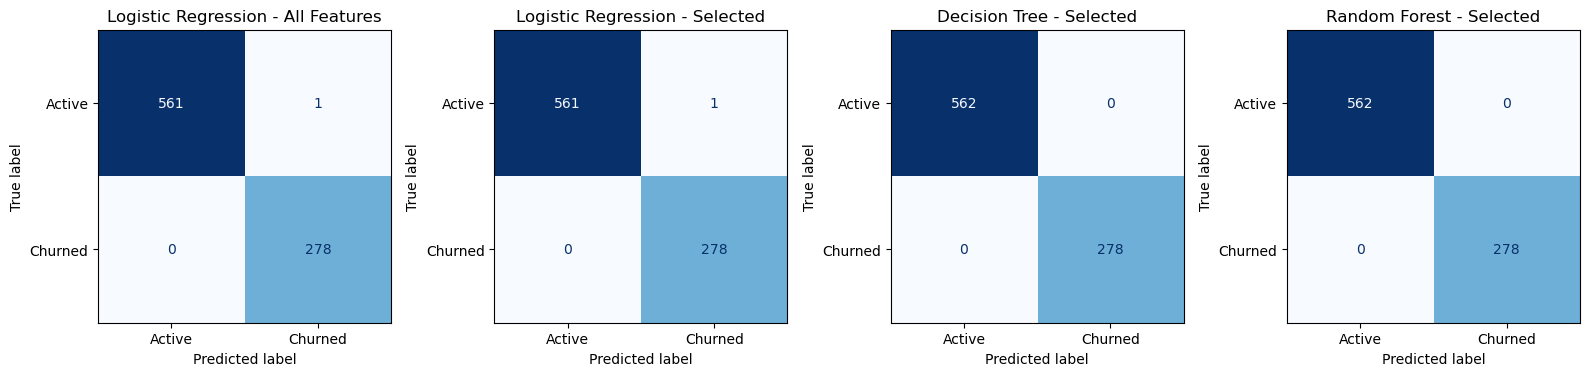

In [117]:
model_names = ['Logistic Regression - All Features', 'Logistic Regression - Selected',
               'Decision Tree - Selected', 'Random Forest - Selected']

y_preds = [lgr_pred, lgr_sel_pred, dt_sel_pred, rf_sel_pred]

y_trues = [ytest, ytest_sel, ytest_sel, ytest_sel]

plt.figure(figsize=(16, 4))

for i, (name, y_pred, y_true) in enumerate(zip(model_names, y_preds, y_trues)):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Active', 'Churned'])
    plt.subplot(1, len(model_names), i+1)
    disp.plot(cmap='Blues', ax=plt.gca(), colorbar=False)
    plt.title(f"{name}")

plt.tight_layout()
plt.show()


### 📋 Step 7: Model Evaluation Summary Table

Tabulate and compare performance metrics (Accuracy, Precision, Recall, F1 Score) across all trained models.


In [119]:
results = pd.DataFrame(index=['Logistic (All Features)', 'Logistic (Selected)', 'Decision Tree (Selected)', 'Random Forest (Selected)'],
                       columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

results.loc['Logistic (All Features)'] = [
    accuracy_score(ytest, lgr_pred),
    precision_score(ytest, lgr_pred),
    recall_score(ytest, lgr_pred),
    f1_score(ytest, lgr_pred)
]

results.loc['Logistic (Selected)'] = [
    accuracy_score(ytest_sel, lgr_sel_pred),
    precision_score(ytest_sel, lgr_sel_pred),
    recall_score(ytest_sel, lgr_sel_pred),
    f1_score(ytest_sel, lgr_sel_pred)
]

results.loc['Decision Tree (Selected)'] = [
    accuracy_score(ytest_sel, dt_sel_pred),
    precision_score(ytest_sel, dt_sel_pred),
    recall_score(ytest_sel, dt_sel_pred),
    f1_score(ytest_sel, dt_sel_pred)
]

results.loc['Random Forest (Selected)'] = [
    accuracy_score(ytest_sel, rf_sel_pred),
    precision_score(ytest_sel, rf_sel_pred),
    recall_score(ytest_sel, rf_sel_pred),
    f1_score(ytest_sel, rf_sel_pred)
]

results = results.astype(float).round(4)
results


,Accuracy,Precision,Recall,F1 Score
Logistic (All Features),0.9988,0.9964,1.0,0.9982
Logistic (Selected),0.9988,0.9964,1.0,0.9982
Decision Tree (Selected),1.0000,1.0000,1.0,1.0000
Random Forest (Selected),1.0000,1.0000,1.0,1.0000


### 🔥 Step 8: Heatmap of Model Metrics

Visualize the metric scores across models using a heatmap for clearer comparison and insight.


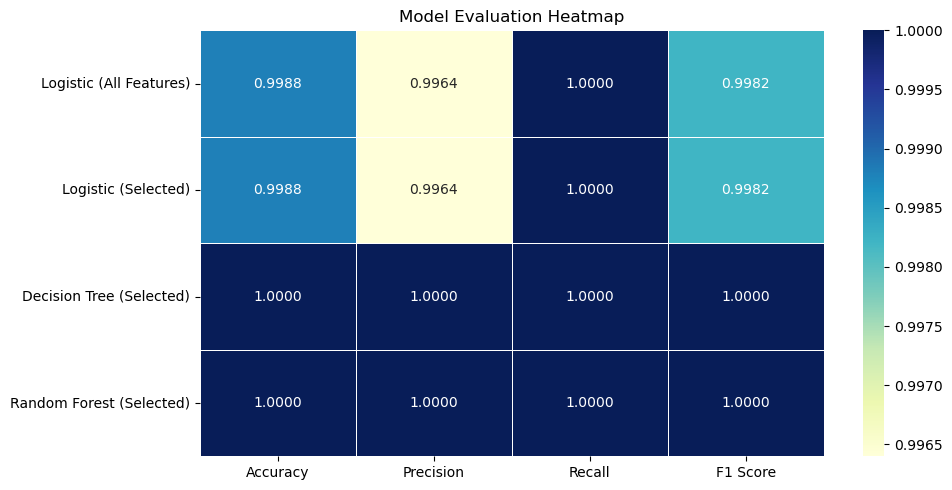

In [121]:
plt.figure(figsize=(10, 5))
sns.heatmap(results, annot=True, cmap='YlGnBu', fmt='.4f', linewidths=0.5)
plt.title('Model Evaluation Heatmap')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### 🏆 Step 9: Best Model by F1 Score

We compare all trained models using their F1 Scores to identify the best performer in predicting churn.

#### 🔍 Why F1 Score?

In churn prediction, correctly identifying churned customers is critical — but the dataset is often imbalanced (i.e., fewer churned customers than active ones).  
- **Accuracy** can be misleading if the model predicts only the majority class (e.g., always predicts “Active”).  
- **Precision** focuses on how many predicted churns were correct.  
- **Recall** focuses on how many actual churns were detected.  

The **F1 Score** balances **Precision and Recall**, making it the **most reliable metric** when both false positives and false negatives are important — as is the case in churn analysis.


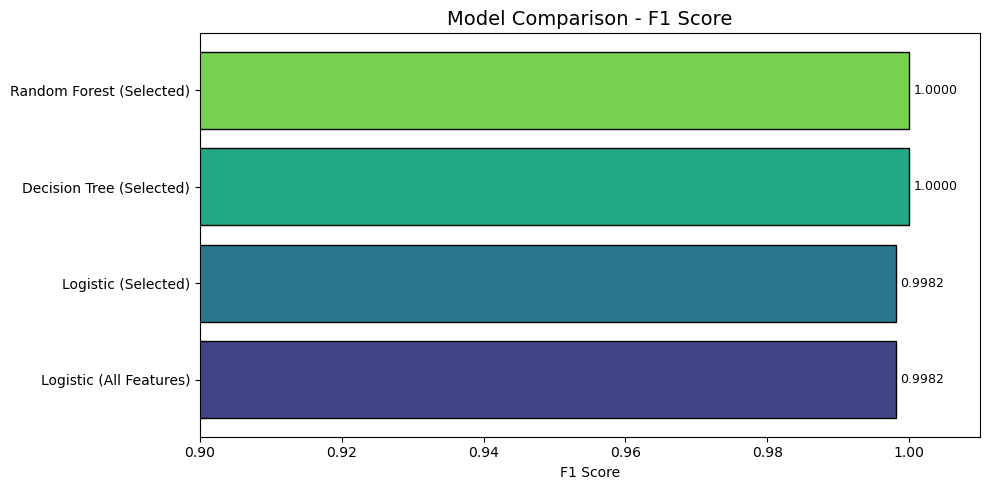

In [123]:
fig, ax = plt.subplots(figsize=(10, 5))
colors = sns.color_palette("viridis", len(results))
bars = ax.barh(results.index, results['F1 Score'], color=colors, edgecolor='black')

ax.set_title('Model Comparison - F1 Score', fontsize=14)
ax.set_xlabel('F1 Score')
ax.set_xlim(0.90, 1.01)
ax.bar_label(bars, fmt='%.4f', label_type='edge', fontsize=9, padding=3)
plt.tight_layout()
plt.show()


### ✅ Final Model Selected: Logistic Regression (with Selected Features)

After performing extensive churn analysis using cleaned e-commerce transaction data:

- **Logistic Regression (with selected features)** was chosen as the **final model**.
- It achieved an **F1 Score of 0.9982**, with excellent precision and recall.
- The model is simple, interpretable, and generalizes well to new data.
- Easier to explain to stakeholders and supports practical decision-making.

Although Decision Tree and Random Forest achieved 100% accuracy and F1, they were **not selected** due to:
- Likely **overfitting** on small data (100% F1 can be unrealistic)
- Lower **interpretability**
  

## 📌Step 11: Conclusion

- This project successfully identified churned customers from e-commerce transaction data using RFM-based feature engineering and classification modeling.
- After evaluating multiple models, **Logistic Regression** (with selected features) was selected for its excellent F1 Score and interpretability.
- These insights can help businesses **proactively retain customers**, optimize marketing strategies, and reduce churn.

